In [1]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [5]:
data_file = "C:/Users/aditk/Desktop/dataset/Reviews.csv"

In [19]:
df = pd.read_csv(data_file)

In [ ]:
df.shape

In [ ]:
df.head()

In [51]:
import tensorflow as tf

from tensorflow import keras


In [19]:
batch_size = 16
data_batches = tf.data.experimental.make_csv_dataset(
    data_file, batch_size=batch_size,
    label_name="Score",
    select_columns=["Score","Summary"])

In [20]:
for feature_batch, label_batch in data_batches.take(1):
  print("'Score': {}".format(label_batch))
  print("features:")
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))


'Score': [5 5 5 5 5 5 4 5 4 5 5 5 5 5 5 4]
features:
  'Summary'           : [b'a good buy' b"I'm buying two!" b'Wife loves the stuff' b'Stunned'
 b'Flavorful and Natural Garrotxa Goat Cheese'
 b'Best canned fruit I have ever eatten' b'On sale' b'good eating'
 b'Firm quality chip' b'Convenient and tasty too!' b'Awesome!!!'
 b'Great raw diet food for on the go!' b'Best  peanut butter made'
 b'Great color' b'Awesome' b'Light Coconut Flavored Coffee.']


In [44]:
a = "ss"
for feature_batch, label_batch in data_batches.take(1):
    for key, value in feature_batch.items():
        # print(value)
        a = value

a.numpy()[1]

b'what quantity is it!'

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
from tensorflow.keras.preprocessing.sequence import pad_sequences

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [6]:
sentences = []
labels = []

with open(data_file, 'r', encoding = "utf8") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[6])
        sentence = row[8]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)

In [80]:
vocab_size = 1000
embedding_dim = 32
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [81]:
len(sentences)

64862

In [82]:
star=np.array([0,0,0,0,0,0])
for value in labels:
    star[int(value)] += 1
    star[0] += 1

In [83]:
prob = star/star[0]
prob_sqared = prob*prob
print("prob       :",prob)
print("prob_sqare :",prob_sqared)
print(np.sum(prob_sqared)-1)

prob       : [1.000 0.161 0.056 0.066 0.110 0.607]
prob_sqare : [1.000 0.026 0.003 0.004 0.012 0.369]
0.4139862322016312


In [84]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [85]:
t =11

val = np.zeros((t,t))

for i in range(t):
    for j in range(t):
        a = i/(t-1)
        b = j/(t-1)
        val[i,j] = ((a*b) + (a-1)*(b-1))

In [86]:
print(val)

[[1.000 0.900 0.800 0.700 0.600 0.500 0.400 0.300 0.200 0.100 0.000]
 [0.900 0.820 0.740 0.660 0.580 0.500 0.420 0.340 0.260 0.180 0.100]
 [0.800 0.740 0.680 0.620 0.560 0.500 0.440 0.380 0.320 0.260 0.200]
 [0.700 0.660 0.620 0.580 0.540 0.500 0.460 0.420 0.380 0.340 0.300]
 [0.600 0.580 0.560 0.540 0.520 0.500 0.480 0.460 0.440 0.420 0.400]
 [0.500 0.500 0.500 0.500 0.500 0.500 0.500 0.500 0.500 0.500 0.500]
 [0.400 0.420 0.440 0.460 0.480 0.500 0.520 0.540 0.560 0.580 0.600]
 [0.300 0.340 0.380 0.420 0.460 0.500 0.540 0.580 0.620 0.660 0.700]
 [0.200 0.260 0.320 0.380 0.440 0.500 0.560 0.620 0.680 0.740 0.800]
 [0.100 0.180 0.260 0.340 0.420 0.500 0.580 0.660 0.740 0.820 0.900]
 [0.000 0.100 0.200 0.300 0.400 0.500 0.600 0.700 0.800 0.900 1.000]]


In [87]:
# train_size = int(len(sentences) * training_portion)
train_size = 14*16*16*16

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

57344
57344
57344
7518
7518


In [88]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

8
150
3
150
2
150


In [89]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

7518
(7518, 150)


In [90]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[1]
[1]
[1]
(57344, 1)
[1]
[1]
[1]
(7518, 1)


In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.LSTM(64),
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.GRU(16, return_sequences=False),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')

])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 150, 16)           16000     
_________________________________________________________________
gru_11 (GRU)                 (None, 150, 32)           4800      
_________________________________________________________________
dense_24 (Dense)             (None, 150, 24)           792       
_________________________________________________________________
gru_12 (GRU)                 (None, 16)                2016      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 66        
Total params: 23,844
Trainable params: 23,844
Non-trainable params: 0
_________________________________________________

In [92]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [93]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, steps_per_epoch = 64)

Train on 57344 samples, validate on 7518 samples
Epoch 1/30
57344/57344 - 43s - loss: 1.5446 - accuracy: 0.5888 - val_loss: 1.3165 - val_accuracy: 0.6198
Epoch 2/30
57344/57344 - 41s - loss: 1.2605 - accuracy: 0.6054 - val_loss: 1.1905 - val_accuracy: 0.6198
Epoch 3/30
57344/57344 - 38s - loss: 1.2040 - accuracy: 0.6054 - val_loss: 1.1738 - val_accuracy: 0.6198
Epoch 4/30
57344/57344 - 38s - loss: 1.1933 - accuracy: 0.6054 - val_loss: 1.1676 - val_accuracy: 0.6198
Epoch 5/30
57344/57344 - 38s - loss: 1.1892 - accuracy: 0.6054 - val_loss: 1.1660 - val_accuracy: 0.6198
Epoch 6/30
57344/57344 - 34s - loss: 1.1875 - accuracy: 0.6054 - val_loss: 1.1638 - val_accuracy: 0.6198
Epoch 7/30
57344/57344 - 36s - loss: 1.1863 - accuracy: 0.6054 - val_loss: 1.1633 - val_accuracy: 0.6198
Epoch 8/30
57344/57344 - 39s - loss: 1.1857 - accuracy: 0.6054 - val_loss: 1.1626 - val_accuracy: 0.6198
Epoch 9/30
57344/57344 - 40s - loss: 1.1854 - accuracy: 0.6054 - val_loss: 1.1626 - val_accuracy: 0.6198
Epoch 

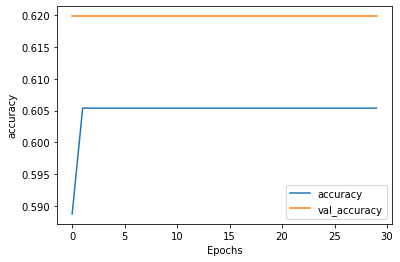

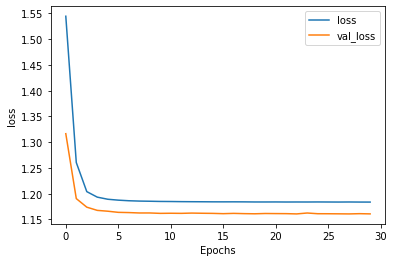

In [94]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

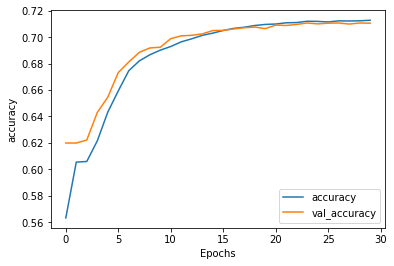

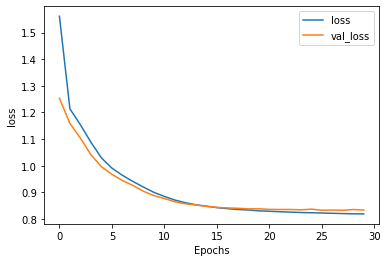

In [69]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 102       
Total params: 17,174
Trainable params: 17,174
Non-trainable params: 0
_________________________________________________________________
Train on 57344 samples, validate on 7518 samples
Epoch 1/30
57344/57344 - 7s - loss: 1.1875 - accuracy: 0.6054 - val

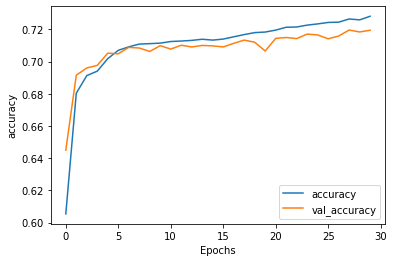

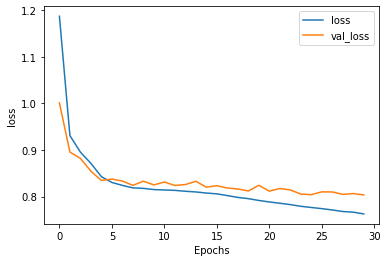

In [50]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.LSTM(64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')

])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, steps_per_epoch = 64*16, callbacks=[callback])

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                4800      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 198       
Total params: 22,054
Trainable params: 22,054
Non-trainable params: 0
_________________________________________________________________
Train on 57344 samples, validate on 7518 samples
Epoch 1/30
57344/57344 - 12s - loss: 1.2449 - accuracy: 0.6054 - val_loss: 1.1616 - val_accuracy: 0.6198
Epoch 2/30
57344/57344 - 9s - loss: 1.0886 - accuracy: 0.6283 - val_loss: 0.9261 - val_accurac

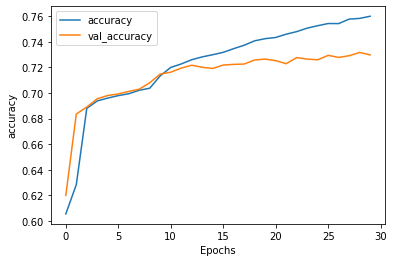

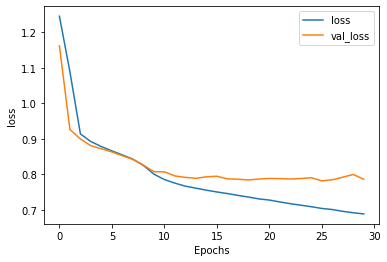

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.LSTM(64, return_sequences=True),
    # tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Bidirectional(LSTM(10, return_sequences=True), input_shape=(5, 10))
    tf.keras.layers.GRU(32, return_sequences=False),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')

])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, steps_per_epoch = 64*4, callbacks=[callback])

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

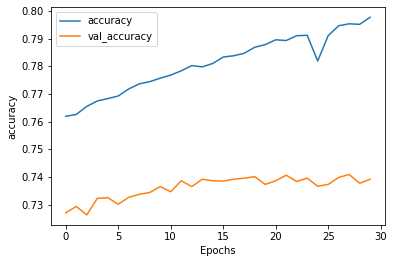

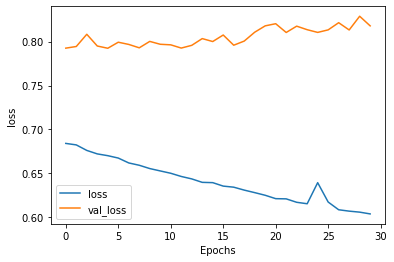

In [48]:
# history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, steps_per_epoch = 64*16, callbacks=[callback])

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 128)           41472     
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                15552     
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 198       
Total params: 74,278
Trainable params: 74,278
Non-trainable params: 0
_________________________________________________________________
Train on 57344 samples, validate on 7518 samples
Epoch 1/30
57344/57344 - 113s - loss: 1.2288 - accuracy: 0.6033 - 

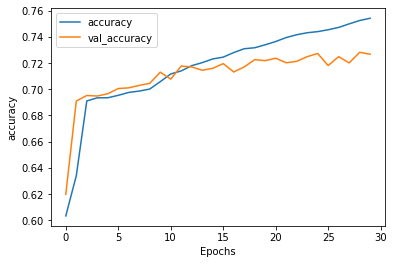

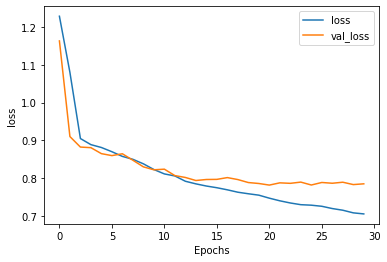

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.LSTM(64, return_sequences=True),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GRU(32, return_sequences=False),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')

])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, steps_per_epoch = 64*4, callbacks=[callback])

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [55]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

dictionary = {reverse_word_index[word_num] : weights[word_num] for word_num in range(1, vocab_size)}

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
gru_3 (GRU)                  (None, 50, 32)            4800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 32)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 50, 24)            792       
_________________________________________________________________
gru_4 (GRU)                  (None, 16)                2016      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)               

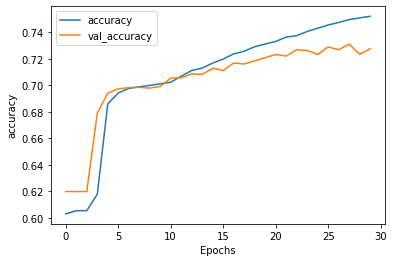

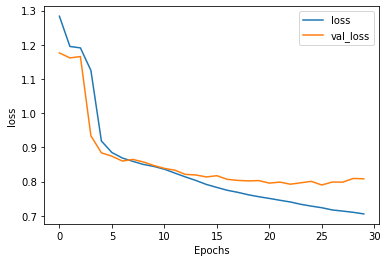

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.LSTM(64),
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.GRU(16, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, steps_per_epoch = 64*4, callbacks=[callback])

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 128)           31488     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
dense_15 (Dense)             (None, 50, 24)            3096      
_________________________________________________________________
gru_6 (GRU)                  (None, 16)                2016      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)               

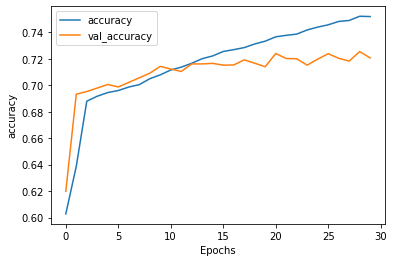

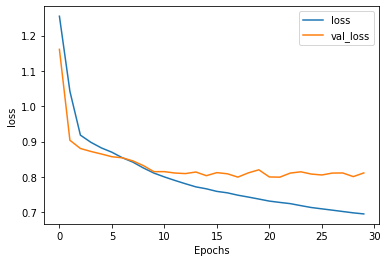

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=max_length),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    # tf.keras.layers.LSTM(64),
    # tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.GRU(16, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, steps_per_epoch = 64*4, callbacks=[callback])

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 150, 20)           20000     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 150, 128)          33024     
_________________________________________________________________
dropout_9 (Dropout)          (None, 150, 128)          0         
_________________________________________________________________
dense_27 (Dense)             (None, 150, 24)           3096      
_________________________________________________________________
gru_14 (GRU)                 (None, 16)                2016      
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)              

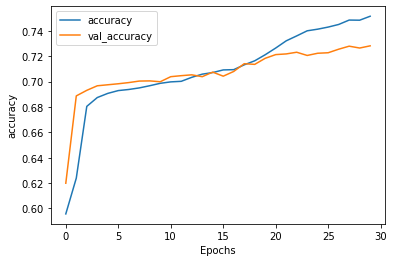

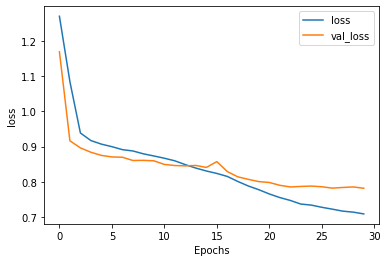

In [95]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 20, input_length=max_length),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    # tf.keras.layers.LSTM(64),
    # tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.GRU(16, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, steps_per_epoch = 64*4, callbacks=[callback])

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 150, 20)           20000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 150, 128)          33024     
_________________________________________________________________
dropout_11 (Dropout)         (None, 150, 128)          0         
_________________________________________________________________
dense_30 (Dense)             (None, 150, 24)           3096      
_________________________________________________________________
gru_16 (GRU)                 (None, 16)                2016      
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)              

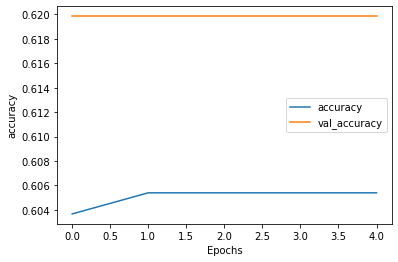

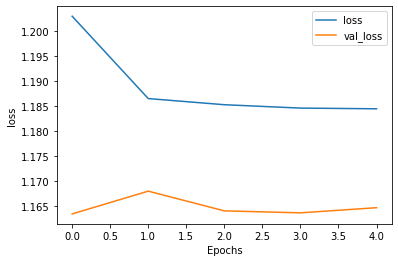

In [96]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 20, input_length=max_length),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    # tf.keras.layers.LSTM(64),
    # tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.GRU(16, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, steps_per_epoch = 64*64, callbacks=[callback])

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")